## Question 1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.


### 1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [497]:
#importing pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the Zomato csv file
data=pd.read_csv('/Users/shabeggill/Downloads/zomato.csv',encoding = "ISO-8859-1")

In [498]:

#Creating two dictionaries; one for Delhi NCR and the other for Rest Of Indua
d1={}
d2={}

#Country Code of India is 1; filtering our dataframe to get details of restaurants in India
data1=data[data['Country Code']==1]

for ele in data1['City']:
    # Delhi NCR consists of New Delhi, Ghaziabad, Noida, Gurgaon and Faridabad
    if ele=='New Delhi' or ele=='Ghaziabad' or ele=='Noida' or ele=='Gurgaon' or ele=='Faridabad':
        #Gives the count of restaurants for each of the 5 cities part of Delhi NCR
        d1[ele]=d1.get(ele,0)+1
    else:
        # Gives the count of restaurants for cities present in Rest of India
        d2[ele]=d2.get(ele,0)+1
        
#sorting the count of restaurants for cities present in Delhi NCR in descending order
z=sorted(d1,key=d1.get,reverse=True)

#creating an array for count of restaurants present in each city of Delhi NCR
Delhi_NCR=[]

for i in z:
    Delhi_NCR.append(d1[i])

#creating a numpy array
np_Delhi_NCR=np.array(Delhi_NCR)

#taking sum of restaurant counts of the five cities present in Delhi NCR to get total number 
#of restaurants present in Delhi NCR
Delhi_NCR_count=np.sum(np_Delhi_NCR)
print(Delhi_NCR_count)

7947


In [499]:
#sorting the count of restaurants for cities present in Rest of India in descending order
y=sorted(d2,key=d2.get,reverse=True) 

#creating an array for count of restaurants present in each city of Rest of India
RestOfIndia=[]

for i in y:
    RestOfIndia.append(d2[i])
    
#creating a numpy array
np_RestOfIndia=np.array(RestOfIndia)

#taking sum of restaurant counts of the cities present in Rest of India to get total number 
#of restaurants present in Rest of India
RestOfIndia_count=np.sum(np_RestOfIndia)
print(RestOfIndia_count)

705


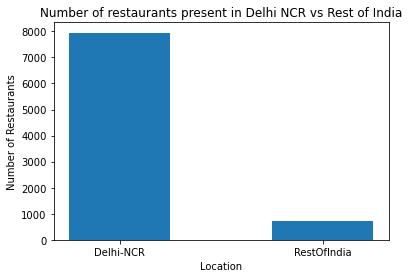

In [500]:
#Plotting the bar graph
location=['Delhi-NCR','RestOfIndia']
restaurant_count=[Delhi_NCR_count,RestOfIndia_count]
plt.bar(location,restaurant_count,width=0.5)
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.title('Number of restaurants present in Delhi NCR vs Rest of India')
plt.show()

### 2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether these cuisines are actually not served in restaurants of Delhi-NCR or is it just due to incomplete dataset.

In [501]:
#Country Code of India is 1; filtering our dataframe to get details of restaurants in India
data1=data[data['Country Code']==1]

#Finding all cuisines present in restaurants in Rest of India
data2=data1[(data1.City!='New Delhi')&(data1.City!='Ghaziabad')&(data1.City!='Noida')&
            (data1.City!='Gurgaon')&(data1.City!='Faridabad')]

#Since restaurants might be serving more than one cuisine, splitting on the basis of "," 
#to get all cuisines for the restaurants
a=data2.Cuisines
splitted1=a.str.split(",")

cuisines_RestOfIndia=[]
for ele in splitted1:
    for i in ele:
        i=i.strip()
        #Getting unique entries in cuisines_RestOfIndia array
        if i not in cuisines_RestOfIndia:
            cuisines_RestOfIndia.append(i)
print(cuisines_RestOfIndia) 
#The list obtained is the list of cuisines present in restaurants present in Rest of India

['North Indian', 'Mughlai', 'Rajasthani', 'Chinese', 'European', 'Gujarati', 'Continental', 'South Indian', 'Desserts', 'Cafe', 'Italian', 'Mexican', 'Pizza', 'Fast Food', 'Mediterranean', 'Thai', 'Ice Cream', 'Beverages', 'Asian', 'Street Food', 'Sandwich', 'Burger', 'Healthy Food', 'American', 'Armenian', 'Salad', 'Bakery', 'Mithai', 'Biryani', 'Juices', 'Maharashtrian', 'Hyderabadi', 'Modern Indian', 'Finger Food', 'Tex-Mex', 'Arabian', 'Charcoal Grill', 'Steak', 'Seafood', 'Tea', 'Japanese', 'Malaysian', 'Burmese', 'Chettinad', 'Spanish', 'Greek', 'Indian', 'Parsi', 'Tibetan', 'French', 'Goan', 'German', 'Andhra', 'Bengali', 'Awadhi', 'Lebanese', 'Kerala', 'Middle Eastern', 'Lucknowi', 'Portuguese', 'African', 'Mangalorean', 'British', 'Malwani', 'Vietnamese', 'Korean', 'Indonesian', 'North Eastern', 'BBQ', 'Cajun']


In [502]:
#Finding all cuisines present in restaurants in Delhi NCR
data3=data1[(data1.City=='New Delhi')|(data1.City=='Ghaziabad')|(data1.City=='Noida')|
            (data1.City=='Gurgaon')|(data1.City=='Faridabad')]

#Since restaurants might be serving more than one cuisine, splitting on the basis of "," 
#to get all cuisines for the restaurants
b=data3.Cuisines
splitted2=b.str.split(",")

cuisines_NCR=[]
for ele in splitted2:
    for i in ele:
        i=i.strip()
        #Getting unique entries in cuisines_NCR array
        if i not in cuisines_NCR:
            cuisines_NCR.append(i)
print(cuisines_NCR)
#The list obtained is the list of cuisines present in Delhi NCR Restaurants

['Chinese', 'Fast Food', 'Bakery', 'North Indian', 'Mithai', 'Mughlai', 'Cafe', 'Raw Meats', 'Burger', 'South Indian', 'Gujarati', 'Rajasthani', 'Thai', 'Desserts', 'American', 'Salad', 'Healthy Food', 'Ice Cream', 'Continental', 'Beverages', 'Italian', 'Pizza', 'Street Food', 'Mexican', 'Juices', 'Asian', 'Seafood', 'Biryani', 'Mediterranean', 'Finger Food', 'Kerala', 'Japanese', 'Lebanese', 'Tea', 'Belgian', 'Kashmiri', 'Sushi', 'European', 'South American', 'Burmese', 'Persian', 'Arabian', 'Steak', 'Bengali', 'Modern Indian', 'Portuguese', 'African', 'Parsi', 'Iranian', 'Malaysian', 'Vietnamese', 'Greek', 'Lucknowi', 'Tibetan', 'Korean', 'Awadhi', 'Hyderabadi', 'Nepalese', 'Drinks Only', 'Pakistani', 'Tex-Mex', 'North Eastern', 'Oriya', 'Chettinad', 'Bihari', 'Afghani', 'Middle Eastern', 'Indonesian', 'Goan', 'Charcoal Grill', 'Assamese', 'Cuisine Varies', 'Andhra', 'Turkish', 'Moroccan', 'Indian', 'French', 'Maharashtrian', 'Naga', 'British', 'Spanish', 'Deli', 'Sandwich', 'Armenia

In [503]:
#Finding out those cuisines which are present in rest of India but not in Delhi NCR
for i in cuisines_RestOfIndia:
    if i not in cuisines_NCR:
        print(i)

German
Malwani
BBQ
Cajun


In [504]:
#Using Zomato API to check whether these cuisines are actually not served in restaurants of Delhi-NCR or 
#is it just due to incomplete dataset.

import requests
import json

#city_id for Delhi NCR is 1
p=requests.get('https://developers.zomato.com/api/v2.1/cuisines',params={'city_id':1},
               headers={'user-key': '8ed094119a0b86b85f48073fe55974cc'})
python_data=p.json()

for i in python_data['cuisines']:
    if 'German' in i['cuisine']['cuisine_name']:
        print('German cuisine is served in Delhi NCR')
    if 'Malwani' in i['cuisine']['cuisine_name']:
        print('Malwani cuisine is served in Delhi NCR')
    if 'BBQ' in i['cuisine']['cuisine_name']:
        print('BBQ cuisine is served in Delhi NCR')
    if 'Cajun' in i['cuisine']['cuisine_name']:
        print('Cajun cuisine is served in Delhi NCR')

BBQ cuisine is served in Delhi NCR
Malwani cuisine is served in Delhi NCR


In [505]:
#From above, using Zomato API, we find out that cuisines "BBQ" and "Malwani" 
#are actually served in Delhi NCR while "German" and "Cajun" cuisines are not served in Delhi NCR. 
#Thus this is due to lack of dataset.

### 3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [506]:
#Country Code of India is 1. Thus filtering dataframe so as to get results for India only
data1=data[data['Country Code']==1]

#Finding all cuisines present in restaurants in Delhi NCR
data2=data1[(data1.City=='New Delhi')|(data1.City=='Ghaziabad')|(data1.City=='Noida')
            |(data1.City=='Gurgaon')|(data1.City=='Faridabad')]

#Since restaurants might be serving more than one cuisine, splitting on the basis of "," 
#to get all cuisines for the restaurants
b=data2.Cuisines
splitted=b.str.split(",")

#Creating a dictionary for Delhi NCR
d1={}

#Getting count of number of restaurants in Delhi NCR serving each cuisine
for ele in splitted:
    for i in ele:
        i=i.strip()
        d1[i]=d1.get(i,0)+1
    
#sorting the count of cuisines served by restaurants in Delhi NCR in descending order
z=sorted(d1,key=d1.get,reverse=True)

#array for cuisines
cuisine_DelhiNCR=[]

#array for number of restaurants serving that cuisine
num_restaurants_DelhiNCR=[]


# Getting top 10 cuisines served by maximum number of restaurants in Delhi NCR
for i in z[0:10]:
    print(i,d1[i])
    
    #appending the cuisines in cuisine_DelhiNCR
    cuisine_DelhiNCR.append(i)
    
    #appending the number of restaurants serving that cuisine in num_restaurants_DelhiNCR
    num_restaurants_DelhiNCR.append(d1[i])

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


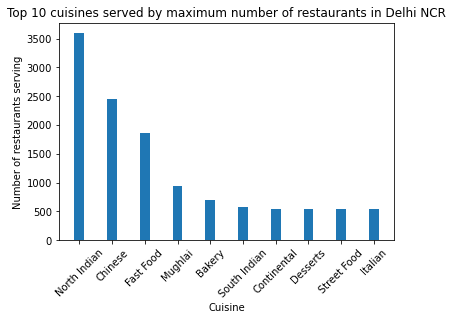

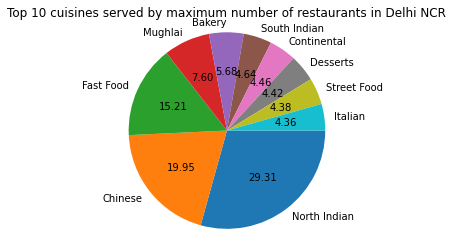

In [507]:
# Plotting a bar graph
plt.bar(cuisine_DelhiNCR,num_restaurants_DelhiNCR,width=0.3)
plt.xlabel('Cuisine')
plt.ylabel('Number of restaurants serving')
plt.title('Top 10 cuisines served by maximum number of restaurants in Delhi NCR')
plt.xticks(rotation=45)
plt.show()

#Plotting a pie chart
plt.pie(num_restaurants_DelhiNCR,labels=cuisine_DelhiNCR,autopct='%.2f',counterclock=False)
plt.axis('equal')
plt.title('Top 10 cuisines served by maximum number of restaurants in Delhi NCR')
plt.show()

In [508]:
#Finding all cuisines present in restaurants in RestOfIndia
data3=data1[(data1.City!='New Delhi')&(data1.City!='Ghaziabad')&(data1.City!='Noida')&
            (data1.City!='Gurgaon')&(data1.City!='Faridabad')]


#Since restaurants might be serving more than one cuisine, splitting on the basis of "," 
#to get all cuisines for the restaurants
b=data3.Cuisines
splitted=b.str.split(",")

#Creating a dictionary for Rest of India
d2={}

#Getting count of number of restaurants in RestOfIndia serving each cuisine
for ele in splitted:
    for i in ele:
        i=i.strip()
        d2[i]=d2.get(i,0)+1
    
#sorting the count of cuisines served by restaurants in Rest of India in descending order
z=sorted(d2,key=d2.get,reverse=True)

#array for cuisines
cuisine_RestOfIndia=[]

#array for number of restaurants serving that cuisine
num_restaurants_RestOfIndia=[]

# Getting top 10 cuisines served by maximum number of restaurants in RestOfIndia
for i in z[0:10]:
    print(i,d2[i])
    
    #appending the cuisines in cuisine_RestOfIndia
    cuisine_RestOfIndia.append(i)
    
    #appending the number of restaurants serving that cuisine in num_restaurants_RestOfIndia
    num_restaurants_RestOfIndia.append(d2[i])

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


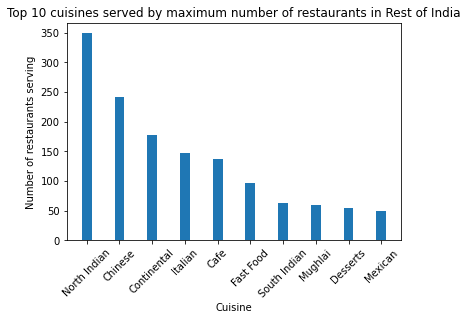

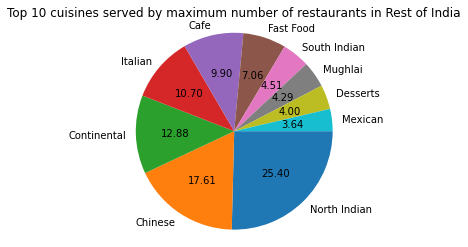

In [509]:
#Plotting a bar graph
plt.bar(cuisine_RestOfIndia,num_restaurants_RestOfIndia,width=0.3)
plt.xlabel('Cuisine')
plt.ylabel('Number of restaurants serving')
plt.title('Top 10 cuisines served by maximum number of restaurants in Rest of India')
plt.xticks(rotation=45)
plt.show()

#Plotting a pie chart
plt.pie(num_restaurants_RestOfIndia,labels=cuisine_RestOfIndia,autopct='%.2f',counterclock=False)
plt.axis('equal')
plt.title('Top 10 cuisines served by maximum number of restaurants in Rest of India')
plt.show()

### 4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

On finding out the top 10 cuisines served by restaurants in Delhi NCR and Rest of India, we observe that North Indian is the top cuisine served by both restuarants in Delhi NCR and Rest of India. 3597 restuarnts in Delhi NCR serve North Indian while 349 restaurants in Rest of India serve North Indian.

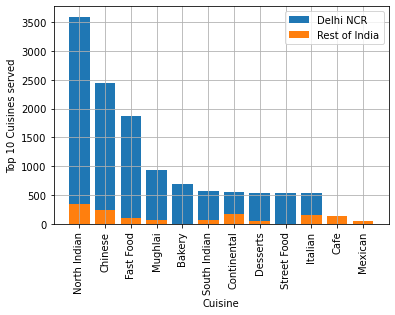

In [510]:
#Plotting a bar graph to visualize how cuisine served is different from Delhi NCR to Rest of India.
plt.bar(cuisine_DelhiNCR,num_restaurants_DelhiNCR,label='Delhi NCR')
plt.bar(cuisine_RestOfIndia,num_restaurants_RestOfIndia,label='Rest of India')
plt.xlabel('Cuisine')
plt.ylabel('Top 10 Cuisines served')
plt.grid()
plt.legend()
plt.xticks(rotation=90)
plt.show()

As we can see from the above graph, a large number of restaurants in Delhi NCR serve North Indian, Chinese and Fast Food. Bakery and Street Food comes among the top 10 cuisines served by restaurants in Delhi NCR but it isn't among the top 10 cuisines served by restaurants in Rest of India. Cafe and Mexican cuisines are among the top 10 cuisines served by restaurants in Rest of India but they aren't among the top 10 cuisines served by restaurants in Delhi NCR. 

## Question 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.


### 1. Write a short detail analysis of how the rating is affected by restaurant due to the following features: Plot a suitable graph to explain your inference.
#### 1. Number of Votes given Restaurant
#### 2. Restaurant serving more number of cuisines.
#### 3. Average Cost of Restaurant
#### 4. Restaurant serving some specific cuisines.

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the Zomato csv file
data=pd.read_csv('/Users/shabeggill/Downloads/zomato.csv',encoding = "ISO-8859-1")

#### 1. Number of Votes given Restaurant

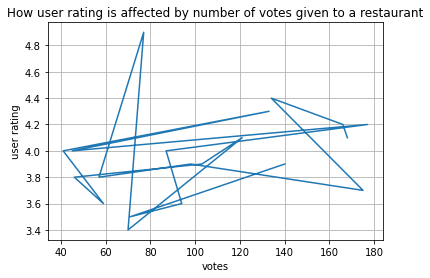

In [512]:
#1. Number of Votes given Restaurant

#Filtering the dataframe for Country India
data1=data[data['Country Code']==1]

#creating an array for user rating
user_rating=[]

#creating an array for number of votes 
num_votes=[]

#Finding the trend for first 20 restaurants.We can change the number of restaurants considered by 
#just making a change in the dataframe defined below
data1=data1[0:20]

for i in data1['Aggregate rating']:
    user_rating.append(i)
    
for i in data1['Votes']:
    num_votes.append(i)

#Plotting Line plot
plt.plot(num_votes,user_rating)
plt.title('How user rating is affected by number of votes given to a restaurant')
plt.xlabel('votes')
plt.ylabel('user rating')
plt.grid()
plt.show()

#Inference
#There doesn't seem to be any direct relation of user rating with the number of votes given to a restaurant. 
#The user rating increases and decreases unexpectedly. No particular trend is observed as such.

#### 2. Restaurant serving more number of cuisines

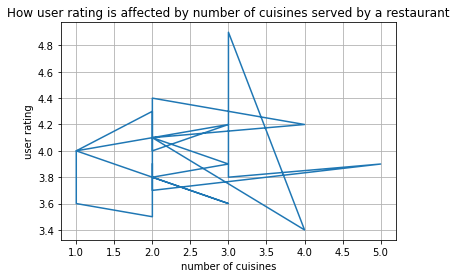

In [513]:
# 2. Restaurant serving more number of cuisines.

#Filtering the dataframe for Country India
data1=data[data['Country Code']==1]

#creating an array for user rating
user_rating=[]

#creating an array for number of cuisines served by a restaurant
num_cuisines=[]

#Finding the trend for first 20 restaurants. We can change the number of restaurants considered by 
#just making a change in the dataframe defined below
data1=data1[0:20]


#Since restaurants might be serving more than one cuisine, splitting on the basis of "," 
#to get all cuisines for the restaurants
b=data1.Cuisines
splitted=b.str.split(",")


#Getting count of number of cuisines served by a restaurant 
for ele in splitted:
    num_cuisines.append(len(ele))

for i in data1['Aggregate rating']:
    user_rating.append(i)
    
#Plotting line plot
plt.plot(num_cuisines,user_rating)
plt.title('How user rating is affected by number of cuisines served by a restaurant')
plt.xlabel('number of cuisines')
plt.ylabel('user rating')
plt.grid()
plt.show()

#Inference:
#There doesn't seem to be any direct relation of user rating with the number of cuisines served by a restaurant. 
#The user rating increases and decreases unexpectedly. No particular trend is observed as such

#### 3. Average Cost of Restaurant


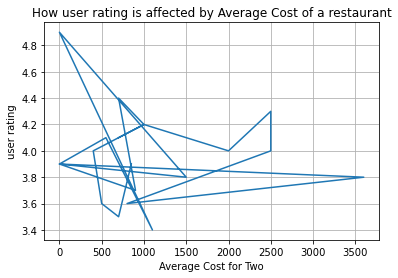

In [514]:
# 3. Average Cost of Restaurant

#Filtering the dataframe for Country India
data1=data[data['Country Code']==1]

#creating an array for user rating
user_rating=[]

#creating an array for Average Cost of a restaurant
avg_cost=[]

#Finding the trend for first 20 restaurants. We can change the number of restaurants considered 
#by just making a change in the dataframe defined below
data1=data1[0:20]

for i in data1['Average Cost for two']:
    avg_cost.append(i)

for i in data1['Aggregate rating']:
    user_rating.append(i)
    
#Plotting line plot
plt.plot(avg_cost,user_rating)
plt.title('How user rating is affected by Average Cost of a restaurant')
plt.xlabel('Average Cost for Two')
plt.ylabel('user rating')
plt.grid()
plt.show()

#Inference:
#There doesn't seem to be any direct relation of user rating with the average cost of a restaurant. 
#The user rating increases and decreases unexpectedly. No particular trend is observed as such.

#### 4. Restaurant serving some specific cuisines

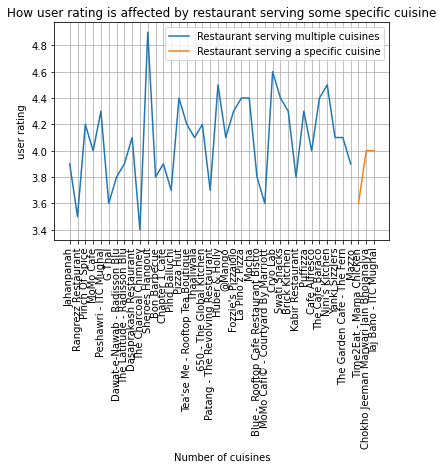

In [515]:
# 4. Restaurant serving some specific cuisines.
#Filtering the dataframe for Country India
data1=data[data['Country Code']==1]

#creating arrays for user rating
user_rating1=[]
user_rating2=[]

#creating an array for restaurants serving multiple cuisines
res_mul_cuisines=[]

#creating an array for restaurants serving specific cuisine
res_one_cuisine=[]

#Finding the trend for first 40 restaurants. We can change the number of restaurants considered 
#by just making a change in the dataframe defined below
data1=data1[0:40]

for i in range(len(data1)):
    if "," in data1['Cuisines'].iloc[i]:
        #implies that restaurant serves multiple cuisines (cuisines would be comma separated)
        user_rating1.append(data1['Aggregate rating'].iloc[i])
        res_mul_cuisines.append(data1['Restaurant Name'].iloc[i])
    else:
        #implies that restaurant serves a specific cuisine
        user_rating2.append(data1['Aggregate rating'].iloc[i])
        res_one_cuisine.append(data1['Restaurant Name'].iloc[i])
  
 #Plotting line plot
plt.plot(res_mul_cuisines,user_rating1,label='Restaurant serving multiple cuisines')
plt.plot(res_one_cuisine,user_rating2,label='Restaurant serving a specific cuisine')
plt.title('How user rating is affected by restaurant serving some specific cuisine')
plt.xlabel('Number of cuisines')
plt.ylabel('user rating')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

#Inference:
# It seems from the graph that restaurants serving a specific cuisine have relatively lower ratings 
#as compared to restaurants serving multiple cusines

### 2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
#### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [516]:
#Country Code of India is 1. Thus filtering dataframe so as to get results for India only
data=data[data['Country Code']==1]

#Creating an array for Locality
locality=[]

#Creating an array for weighted rating
weighted_rating=[]
        
#considering unique localities
a=data.Locality.unique()

for i in a:
    locality.append(i)
    #creating separate dataframe for each unique locality
    df=data.copy()
    df=df[df['Locality']==i] 
    
    #multiplying number of votes by aggregate rating for each restauarnt in that locality
    df['Aggregate rating']=df['Votes']*df['Aggregate rating']
    
    #taking care of cases where votes are 0
    if df['Votes'].sum()==0:
        weighted_rating.append(0)
    else:
        #calculating weighted restaurant rating
        wrr=(df['Aggregate rating'].sum())/(df['Votes'].sum())
        weighted_rating.append(wrr)

# sorting the arrays in descending order wrt the weighted restaurant rating
z=sorted(zip(weighted_rating,locality),reverse=True)
weighted_rating,locality=map(list,zip(*z))


for i in range(len(locality)):
    #gives the weighted restaurant rating of each locality
    print(locality[i],weighted_rating[i])


Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.7187617260787995
Sector 5, Salt Lake 4.707022552098202
Riverside Mall, Gomti Nagar 4.7
Jubilee Hills 4.623518181818182
Borivali West 4.60190856635597
Shastri Nagar 4.6
Sainikpuri 4.6
New BEL Road 4.6
Kilpauk 4.6
Kidderpore 4.6
JP Nagar 4.6
Gandhipuram 4.6
Chittoor Road 4.6
Cavelossim 4.6
CMR Central Mall, Maddilapalem 4.6
Arambol 4.6
Marathahalli 4.57508238276299
Anjuna 4.5446681580909765
Indiranagar 4.541504487244126
Saibaba Colony 4.532541567695962
Panaji 4.524134660976767
Ulubari 4.513896457765668
R Deccan Mall, JM Road 4.5
Pratap Nagar 4.5
Prahlad Nagar 4.5
Phoenix Market City, Viman Nagar 4.5
Koramangala 7th Block 4.5
Kasbah, Greater Kailash (GK) 1 4.5
Balewadi High Street, Balewadi 4.5
Koramangala 5th Block 4.489209290187891
Hitech City 4.473508500772797
Ballygunge 4.

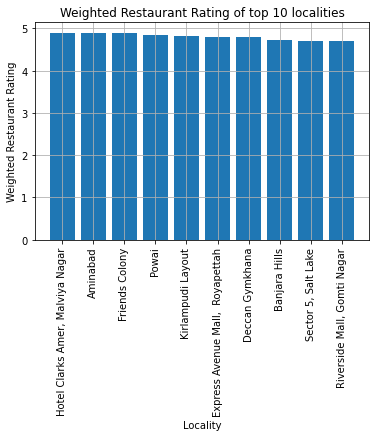

In [517]:
# Bar graph representation for Top 10 localities with maximum weighted restaurant rating
plt.bar(locality[0:10],weighted_rating[0:10])
plt.xlabel('Locality')
plt.ylabel('Weighted Restaurant Rating')
plt.title('Weighted Restaurant Rating of top 10 localities')
plt.xticks(rotation=90)
plt.grid()
plt.show()

## Question 3. Visualization
### 1. Plot the bar graph top 15 restaurants have a maximum number of outlets.
### 2. Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
### 3. Plot the bar graph top 10 restaurants in the data with the highest number of votes.
### 4. Plot the pie graph of top 10 cuisines present in restaurants in the USA.
### 5. Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.


#### 1. Plot the bar graph top 15 restaurants have a maximum number of outlets.

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the Zomato csv file
data=pd.read_csv('/Users/shabeggill/Downloads/zomato.csv',encoding = "ISO-8859-1")

In [519]:
# 1. Plot the bar graph of top 15 restaurants which have maximum number of outlets.

#Country Code of India is 1. Thus filtering dataframe so as to get results for India only
data=data[data['Country Code']==1]

#Specifies the name of top 15 restaurants wrt number of outlets
restaurant=data['Restaurant Name'].value_counts()[:15].keys()

#Specifies the number of outlets of top 15 restuarants
outlets=data['Restaurant Name'].value_counts()[:15].values

for i in range(15):
    print(restaurant[i],outlets[i])

Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 29
Giani 29
Baskin Robbins 28
Barbeque Nation 25
Giani's 22
Dunkin' Donuts 22
Barista 22
Pind Balluchi 20
Costa Coffee 20


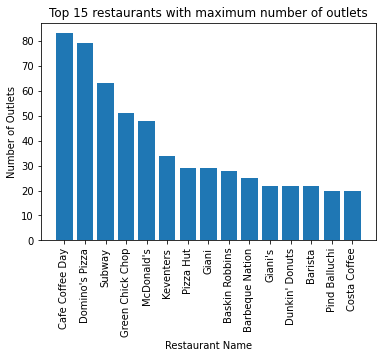

In [520]:
#Plotting the bar graph
plt.bar(restaurant,outlets)
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Outlets')
plt.title('Top 15 restaurants with maximum number of outlets')
plt.xticks(rotation=90)
plt.show()

#### 2. Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

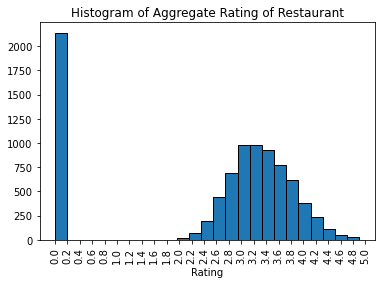

In [521]:
# 2. Plot the histogram of aggregate rating of restaurant(drop the unrated restaurant)

#Country Code of India is 1. Thus filtering dataframe so as to get results for India only
data=data[data['Country Code']==1]

#Dropping the unrated restaurants
data.dropna(subset=['Aggregate rating'],inplace=True)

# Creating an array for Aggregate rating
a=[]

for i in data['Aggregate rating']:
    a.append(i)
    
xt=np.arange(0,5.1,0.2)
plt.hist(a,bins=25,edgecolor='black')
plt.title('Histogram of Aggregate Rating of Restaurant')
plt.xlabel('Rating')

#no of bins are calculated via (5.0-0.0)/0.2. This way width of each bar is 0.2
plt.xticks(xt,rotation=90)
plt.show()

####  3. Plot the bar graph top 10 restaurants in the data with the highest number of votes.


In [522]:
# 3. Plot the bar graph top 10 restaurants in the data with the highest number of votes.

#Country Code of India is 1. Thus filtering dataframe so as to get results for India only
data=data[data['Country Code']==1]

#Specifies the name of the restaurant 
restaurant=data.groupby('Restaurant Name').Votes.sum().keys()

#Specifies the number of votes of the restaurants
votes=data.groupby('Restaurant Name').Votes.sum().values

# Sorting the arrays in descending order wrt the number of votes
z=sorted(zip(votes,restaurant),reverse=True)
votes,restaurant=map(list,zip(*z))

#printing the top 10 restaurants wrt the number of votes
for i in range(10):
    print(restaurant[i],votes[i])

Barbeque Nation 27835
AB's - Absolute Barbecues 13400
Toit 10934
Big Chill 10853
Truffles 9682
Farzi Cafe 9189
Chili's 8156
Hauz Khas Social 7931
Joey's Pizza 7807
Peter Cat 7574


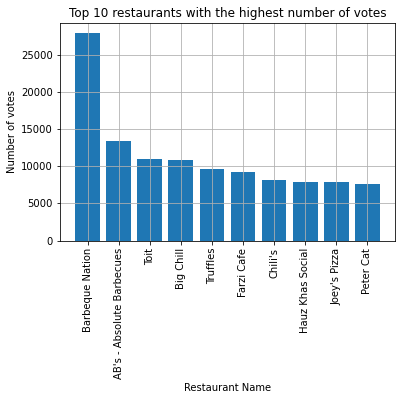

In [523]:
#Plotting bar graph
plt.bar(restaurant[0:10],votes[0:10])
plt.xlabel('Restaurant Name')
plt.ylabel('Number of votes')
plt.title('Top 10 restaurants with the highest number of votes')
plt.grid()
plt.xticks(rotation=90)
plt.show()

#### 4. Plot the pie graph of top 10 cuisines present in restaurants in the USA.


In [528]:
#4. Plot the pie graph of top 10 cuisines present in restaurants in the USA.

#Country Code of USA is 216. Thus filtering dataframe so as to get results for USA only

data=data[data['Country Code']==216]

#Dropping the entries with missing values of Cuisines
data.dropna(subset=['Cuisines'],inplace=True)

#Since restaurants might be serving more than one cuisine, splitting on the basis of "," 
#to get all cuisines for the restaurants
b=data.Cuisines
splitted=b.str.split(",")

#Creating a dictionary for USA
d={}

#Getting count of number of restaurants in USA serving each cuisine
for ele in splitted:
    for i in ele:
        i=i.strip()
        d[i]=d.get(i,0)+1
  
 #sorting the count of cuisines served by restaurants in USA in descending order
z=sorted(d,key=d.get,reverse=True)

#array for cuisines
cuisine=[]

#array for number of restaurants serving that cuisine
num_restaurants=[]

# Getting top 10 cuisines served by maximum number of restaurants in USA
for i in z[0:10]:
    print(i,d[i])
    
    #appending the cuisines in cuisine array
    cuisine.append(i)
    
    #appending the number of restaurants serving that cuisine in num_restaurants array
    num_restaurants.append(d[i])

American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


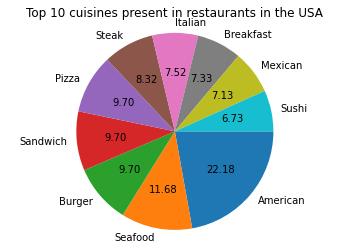

In [529]:
#Plotting the pie chart
plt.pie(num_restaurants,labels=cuisine,autopct='%.2f',counterclock=False)
plt.axis('equal')
plt.title('Top 10 cuisines present in restaurants in the USA')
plt.show()

#### 5. Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble


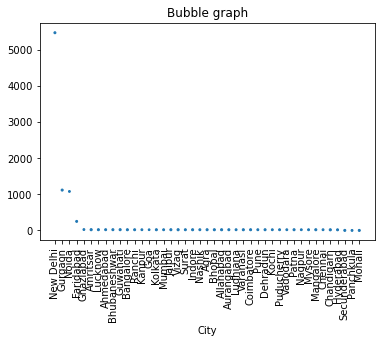

In [532]:
# 5. Plot the bubble graph of a number of Restaurants present in the city of 
#India and keeping the weighted restaurant rating of the city in a bubble

#Country Code of India is 1. Thus filtering dataframe so as to get results for India only
data=data[data['Country Code']==1]

#creating an array for weighted restaurant rating
weighted_rating=[]

#Considering unique cities
a=data.City.unique()

for i in a:
    #creating separate dataframe for each city
    df=data.copy()
    df=df[df['City']==i] 
    
    #multiplying number of votes by aggregate rating for each restauarnt in that city
    df['Aggregate rating']=df['Votes']*df['Aggregate rating']
    
    #taking care of cases where votes are 0
    if df['Votes'].sum()==0:
        weighted_rating.append(0)
    else:
        #calculating weighted restaurant rating
        wrr=(df['Aggregate rating'].sum())/(df['Votes'].sum())
        weighted_rating.append(wrr)

#specifies the city
city=data['City'].value_counts().keys()

#specifies the number of restauarnts in that city
num_restaurant=data['City'].value_counts().values

#plotting bubble graph
plt.scatter(city,num_restaurant,s=weighted_rating)
plt.title('Bubble graph')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.show()